In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/matteovalle/Documents/GitHub/vallematteo.github.io/vallematteo.github.io/flood_credit_risk_abm


In [55]:
import os
import numpy as np
import glob
import pandas as pd
from scipy.stats import genextreme
import joblib
from output.test import *
import matplotlib.pyplot as plt
import seaborn as sns

ROOT_DIR = os.getcwd()
print(ROOT_DIR)
FOLDER = ROOT_DIR + '/' + 'output/test'
all_files = glob.glob(os.path.join(FOLDER, '*'))
csv_files = {}
for file in all_files:
   if file.endswith('.csv'):
      csv_files[os.path.basename(file)] = pd.read_csv(file)

/Users/matteovalle/Documents/GitHub/vallematteo.github.io/vallematteo.github.io/flood_credit_risk_abm


In [42]:
for key in csv_files.keys():
    print(key, csv_files[key].shape)

default_score200.0_r50_set2_2.csv (0, 1)
default_score200.0_r50_set2_0.csv (0, 1)
default_score200.0_r50_set2_1.csv (0, 1)
mature_score200.0_r50_set2_2.csv (81, 20)
mature_score200.0_r50_set2_0.csv (73, 20)
mature_score200.0_r50_set2_1.csv (98, 20)
agents_output_score200.0_r50_set2_1.csv (11871, 21)
agents_output_score200.0_r50_set2_0.csv (12009, 21)
agents_output_score200.0_r50_set2_2.csv (11980, 21)
model_output_score200.0_r50_set2_2.csv (10, 9)
model_output_score200.0_r50_set2_0.csv (10, 9)
model_output_score200.0_r50_set2_1.csv (10, 9)


In [37]:
print(csv_files.items())

dict_items([('default_score200.0_r50_set2_2.csv', Empty DataFrame
Columns: [Unnamed: 0]
Index: []), ('default_score200.0_r50_set2_0.csv', Empty DataFrame
Columns: [Unnamed: 0]
Index: []), ('default_score200.0_r50_set2_1.csv', Empty DataFrame
Columns: [Unnamed: 0]
Index: []), ('mature_score200.0_r50_set2_2.csv',     Unnamed: 0  step    id       score    x    y         u       income  \
0            0     2   929  228.000000  655   57  0.999487  6595.915414   
1            1     2   343  222.000000  375   70  0.995240  6026.751136   
2            2     2   623  228.000000  419  196  0.998430  4524.563738   
3            3     2   368  228.000000  377   61  0.993883  2702.743131   
4            4     2   236  224.000000  370   64  0.993658  1656.939262   
..         ...   ...   ...         ...  ...  ...       ...          ...   
84          84    18  1129  222.444444  661   47  0.995602  5000.000000   
85          85    18   759  222.444444  600  164  0.998152  1770.854233   
86          

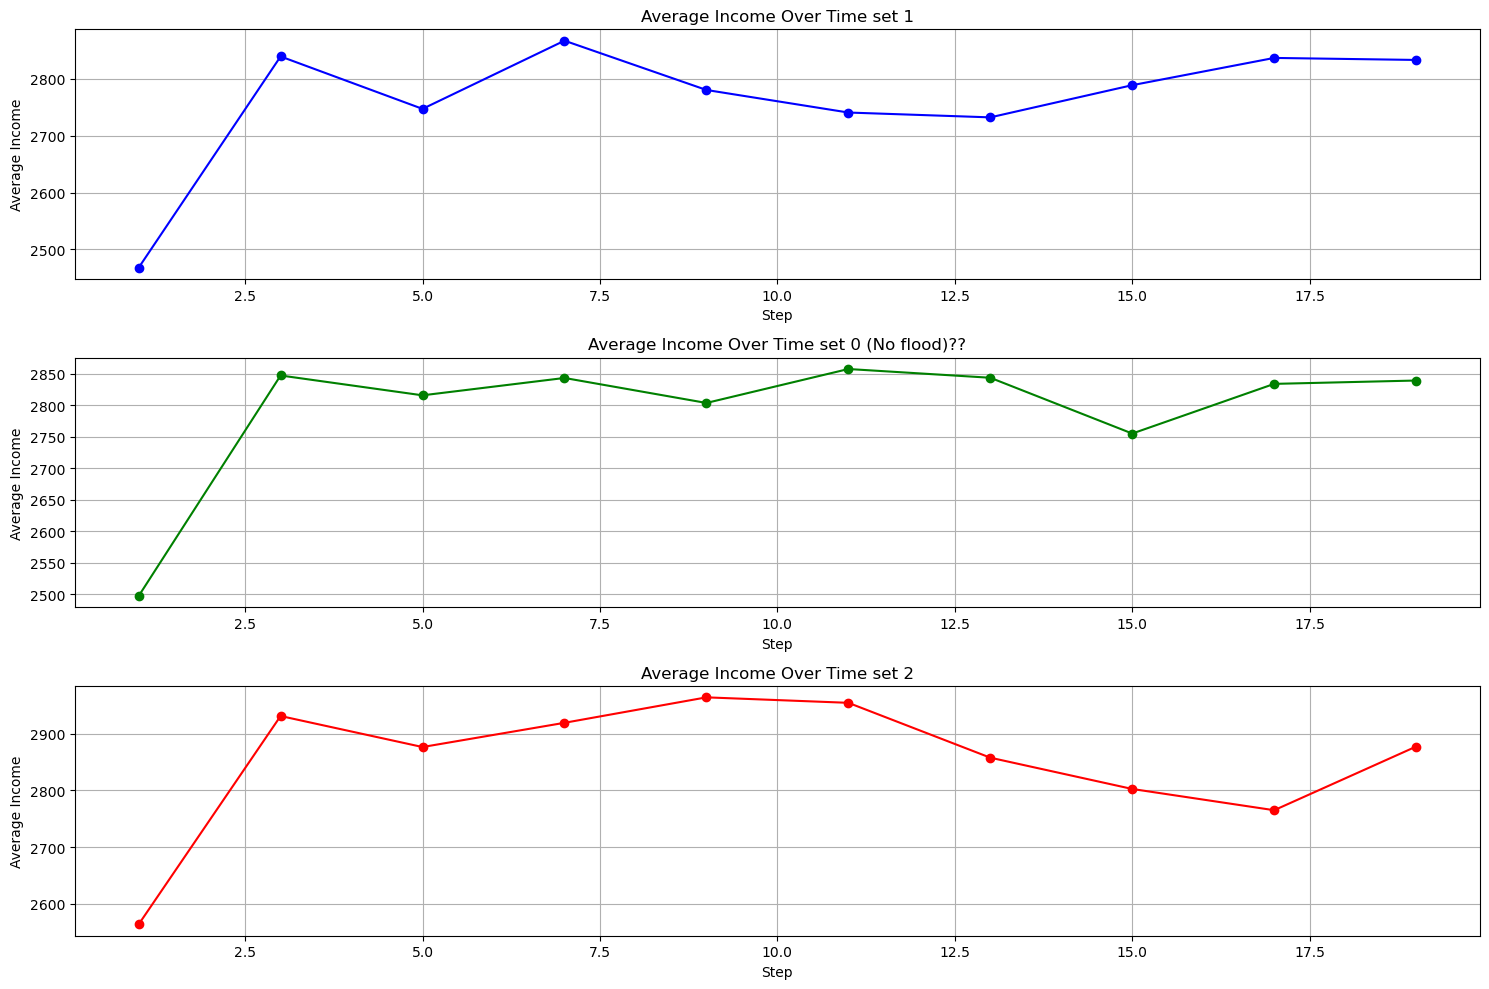

In [46]:
df1 = csv_files['agents_output_score200.0_r50_set2_1.csv']
df2 = csv_files['agents_output_score200.0_r50_set2_0.csv']
df3 = csv_files['agents_output_score200.0_r50_set2_2.csv']

aggregated_income1 = df1.groupby('Step')['income'].mean()
aggregated_income2 = df2.groupby('Step')['income'].mean()
aggregated_income3 = df3.groupby('Step')['income'].mean()

plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.plot(aggregated_income1.index, aggregated_income1.values, marker='o', linestyle='-', color='b')
plt.title('Average Income Over Time set 1')
plt.xlabel('Step')
plt.ylabel('Average Income')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(aggregated_income2.index, aggregated_income2.values, marker='o', linestyle='-', color='g')
plt.title('Average Income Over Time set 0 (No flood)??')
plt.xlabel('Step')
plt.ylabel('Average Income')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(aggregated_income3.index, aggregated_income3.values, marker='o', linestyle='-', color='r')
plt.title('Average Income Over Time set 2')
plt.xlabel('Step')
plt.ylabel('Average Income')
plt.grid(True)

plt.tight_layout()
plt.show()

### Figure 4.3 and Figure 4.4

In [56]:
ROOT_DIR = os.getcwd()
print(ROOT_DIR)
FOLDER = ROOT_DIR + '/' + 'output/test2'
all_files = glob.glob(os.path.join(FOLDER, '*'))
csv_files = {}
for file in all_files:
   if file.endswith('.csv') and 'model_output_score' in os.path.basename(file):
      csv_files[os.path.basename(file)] = pd.read_csv(file)
for filename in csv_files:
    print(f"Loaded {filename} Shape {csv_files[filename].shape}")
#rename the first column to Step
for key in csv_files.keys():
   csv_files[key] = csv_files[key].rename(columns={'Unnamed: 0': 'Step'})
   print(key, csv_files[key].shape)

/Users/matteovalle/Documents/GitHub/vallematteo.github.io/vallematteo.github.io/flood_credit_risk_abm
Loaded model_output_score200.0_r50_set3_9.csv Shape (154, 9)
Loaded model_output_score200.0_r50_set3_8.csv Shape (149, 9)
Loaded model_output_score200.0_r50_set1_8.csv Shape (150, 9)
Loaded model_output_score200.0_r50_set1_9.csv Shape (146, 9)
Loaded model_output_score200.0_r50_set4_9.csv Shape (148, 9)
Loaded model_output_score200.0_r50_set4_8.csv Shape (149, 9)
Loaded model_output_score200.0_r50_set0_8.csv Shape (144, 9)
Loaded model_output_score200.0_r50_set0_9.csv Shape (144, 9)
Loaded model_output_score200.0_r50_set2_9.csv Shape (146, 9)
Loaded model_output_score200.0_r50_set2_8.csv Shape (147, 9)
Loaded model_output_score200.0_r50_set0_7.csv Shape (147, 9)
Loaded model_output_score200.0_r50_set2_5.csv Shape (146, 9)
Loaded model_output_score200.0_r50_set4_3.csv Shape (150, 9)
Loaded model_output_score200.0_r50_set4_2.csv Shape (150, 9)
Loaded model_output_score200.0_r50_set2_4.cs

In [57]:
set0_files = {k: v for k, v in csv_files.items() if 'set0' in k}
set1_files = {k: v for k, v in csv_files.items() if 'set1' in k}
set2_files = {k: v for k, v in csv_files.items() if 'set2' in k}
set3_files = {k: v for k, v in csv_files.items() if 'set3' in k}
set4_files = {k: v for k, v in csv_files.items() if 'set4' in k}


# Concatenate the DataFrames for each set
set0_df = pd.concat(set0_files.values(), ignore_index=True) if set0_files else pd.DataFrame()
set1_df = pd.concat(set1_files.values(), ignore_index=True) if set1_files else pd.DataFrame()
set2_df = pd.concat(set2_files.values(), ignore_index=True) if set2_files else pd.DataFrame()
set3_df = pd.concat(set3_files.values(), ignore_index=True) if set3_files else pd.DataFrame()
set4_df = pd.concat(set4_files.values(), ignore_index=True) if set4_files else pd.DataFrame()

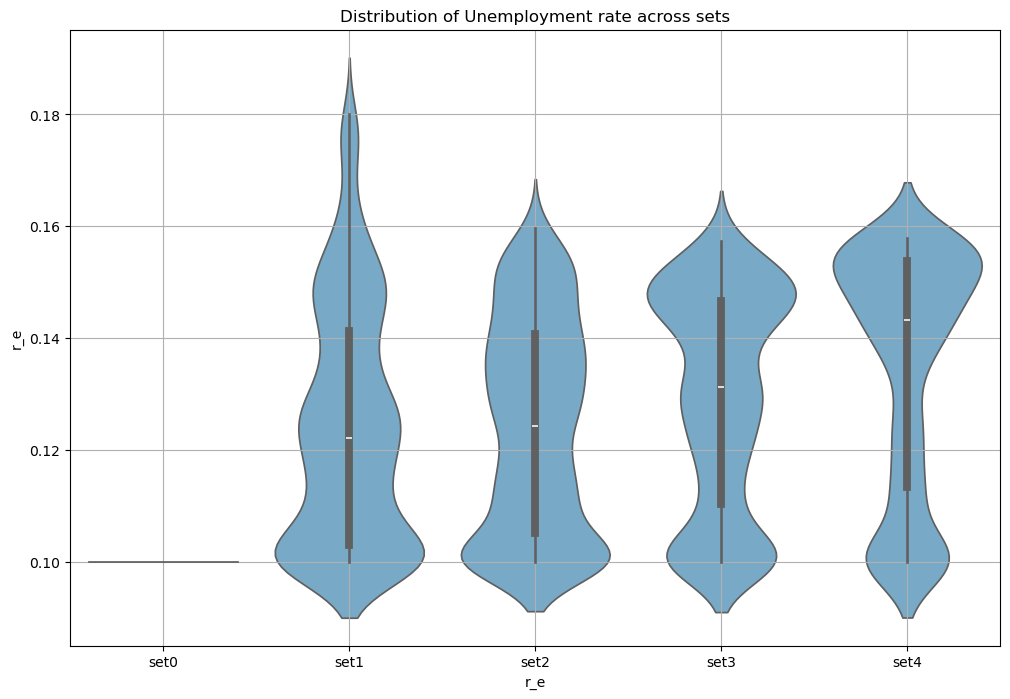

In [85]:
cmap = plt.get_cmap("Blues")
colors = [cmap(0.5)]
plt.figure(figsize=(12, 8))
for dataset in [set0_df, set1_df, set2_df, set3_df, set4_df]:
    sns.violinplot(data=dataset, x='set', y='r_e', hue='set', palette=colors, legend=False)
plt.title('Distribution of Unemployment rate across sets')
plt.xlabel('r_e')
plt.grid(True)
plt.show()

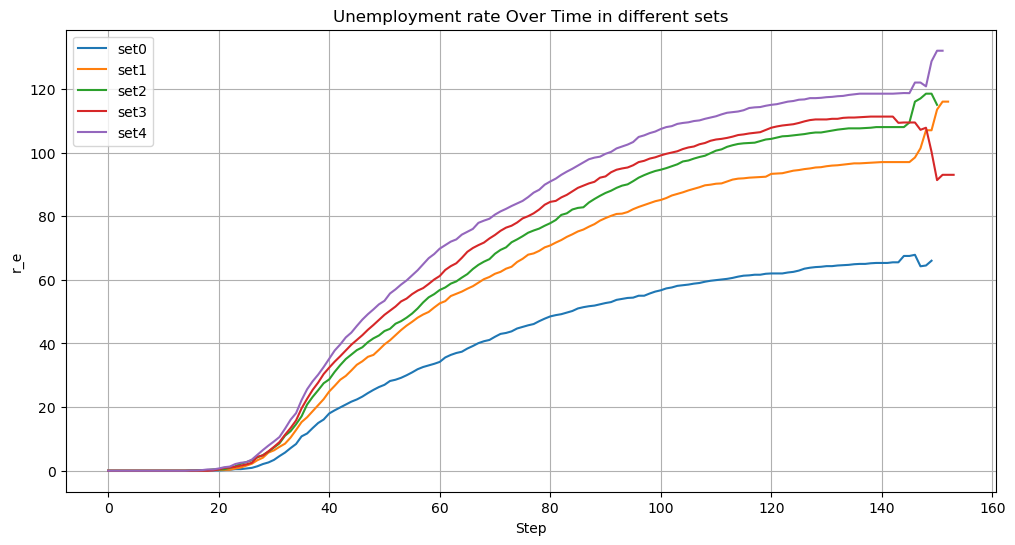

In [82]:
plt.figure(figsize=(12, 6))
for dataset in [set0_df, set1_df, set2_df, set3_df, set4_df]:
   aa = dataset.groupby('Step')['num_default'].mean()
   plt.plot(aa.index, aa.values, linestyle='-', label=dataset['set'].values[0])
plt.title('Unemployment rate Over Time in different sets')
plt.xlabel('Step')
plt.ylabel('r_e')
plt.legend()  
plt.grid(True) 
plt.show()

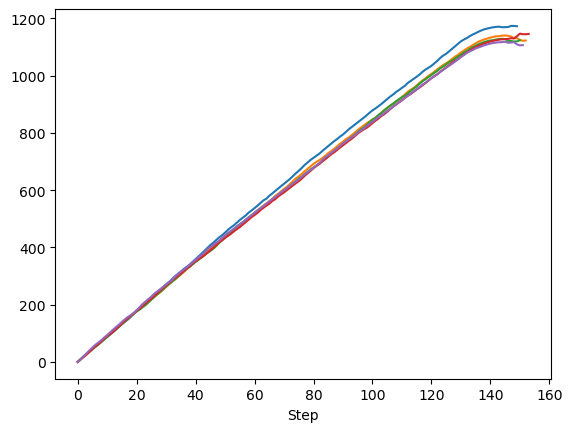

In [76]:
for dataset in [set0_df, set1_df, set2_df, set3_df, set4_df]:
   dataset.groupby('Step')['num_mature'].mean().plot()

In [72]:
set0_df.tail(50)

,Step,gev,epsilon,r_e,tot_num_agents,tot_num_agents_his,num_default,num_mature,num_new_join,set
1420,98,0,1.0,0.1,313,1239,51,875,0,set0
1421,99,0,1.0,0.1,302,1239,51,886,0,set0
1422,100,0,1.0,0.1,289,1239,52,898,0,set0
1423,101,0,1.0,0.1,283,1239,53,903,0,set0
1424,102,0,1.0,0.1,277,1239,54,908,0,set0
1425,103,0,1.0,0.1,265,1239,54,920,0,set0
1426,104,0,1.0,0.1,259,1239,54,926,0,set0
1427,105,0,1.0,0.1,247,1239,55,937,0,set0
1428,106,0,1.0,0.1,239,1239,55,945,0,set0
1429,107,0,1.0,0.1,233,1239,55,951,0,set0
